<a href="https://colab.research.google.com/github/Golem8/Music-Genre-Classifier/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import os
!pip install pydub
from pydub.utils import make_chunks
from pydub import AudioSegment
import numpy as np
#from numpy import fft as fft
#from scipy import fftpack as fourier
###testing
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
#import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import IPython.display as ipd

In [ ]:
# this could differ based on how you saved the shared folder
#sharedPath = r'/content/drive/MyDrive/APS360 Team Project' # Simon's path
sharedPath = r'/content/drive/MyDrive/APS360 Team Project' # Daniels path
#sharedPath = r'/content/drive/MyDrive/Year 1 (2020-2021)/APS360 - Applied Fundamentals of Machine Learning/APS360 Team Project' # Matthew's path

In [ ]:
smallSet = True

for block in ['block1','block2','block3','block4','block5']:
  if smallSet:
    blockPath = os.path.join(sharedPath, 'data', 'small_baseline', block)
  else:
    blockPath = os.path.join(sharedPath, 'data', block)
  for filename in os.listdir(blockPath):
    if filename.endswith('.wav'):
      twoSecClip = AudioSegment.from_wav(os.path.join(blockPath,filename))

      #each subclip is 200ms long
      chunks = make_chunks(twoSecClip, 200)

      # iterate over the newly created objects
      for chunk in chunks:
        if len(chunk) != 200:
          print('Something went wrong with chunk splitting')
        else:
          # im not sure what format you will need it in, so here are some options

          # make it mono instead of stero for fourier transform 
          chunk = chunk.set_channels(1)

          # chunks are pydub audio segments. It may be necessary to change
          # the datatype depending on the fourier transform method used.
          # if using numpy, try this:
          # chunk_array = np.array(chunk.get_array_of_samples())

          # use this function to do the fft. It will be called with every 200ms clip


          #print(chunk_array)
          
          # this makes an array of samples
          # librosa loads fils as float32, so convert it
          # https://stackoverflow.com/questions/58810035/converting-audio-files-between-pydub-and-librosa
          chunk_array = np.array(chunk.get_array_of_samples()).astype(np.float32) # /32768

          # kaiser_best is high quality mode, both the original and trarget sr are the same
          chunk_array = librosa.core.resample(chunk_array, chunk.frame_rate, chunk.frame_rate, res_type='kaiser_best') 
          # print(chunk_array)

          x = chunk_array
          sr = chunk.frame_rate
          #print(type(x), len(x))
          #print(type(sr), sr)
          #print(sr)
          #print(len(x)/sr)

          t = np.array(range(0,len(x))) / sr
          # plt.plot(t, x)
          # plt.xlabel('Time')
          # plt.ylabel('Pressure')
          # ipd.Audio(x, rate = sr)

          y = np.fft.fft(x)
          fr_xaxis_range = np.array(range(0, len(y))) / 4

          #plt.plot(fr_xaxis_range, np.abs(y))
          #plt.xlabel('Frequency in Hertz')
          print(y)


          # #time_step = 0.2
          # #period = 4 #Create more points
          # #time_vec = np.arange(0, 0.2, time_step)
          # #sig = (np.sin(2*np.pi*time_vec))
          # #sig = sig + 0.25 *np.random.randn(time_vec.size) #adding noise
          # #print(np.round(sig,2))
          # sig = chunk_array
         
          # sig_fft = fourier.fft(sig)
          # #print(sig_fft)
          # amplitude = np.abs(sig_fft)
          # amplitude**2
          # angle = np.angle(sig_fft)

          # sample_freq = fourier.fftfreq(sig.size, d = time_step)
          # #print(amplitude)
          # #print(sample_freq)
         
          # amp_freq = np.array([amplitude, sample_freq])
          # max_pos = amp_freq[0,:].argmax()
          # peaked_freq = amp_freq[1, max_pos]

          # print(max_pos)
          # print(peaked_freq)


<class 'numpy.ndarray'> 44100
<class 'int'> 22050
22050
2.0


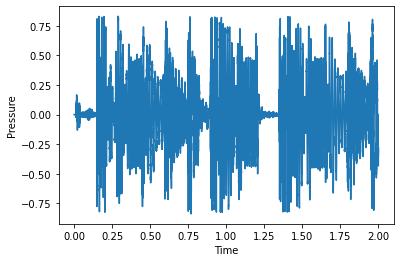

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import IPython.display as ipd

x, sr = librosa.load(sharedPath + '/data/small_baseline/block1/091081_0_reg.wav')
print(type(x), len(x))
print(type(sr), sr)
print(sr)
print(len(x)/sr)

t = np.array(range(0,len(x))) / sr
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Pressure')
ipd.Audio(x, rate = sr)

2204.75


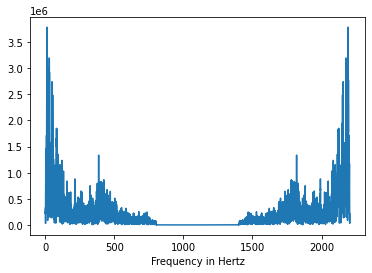

In [ ]:
y = np.fft.fft(x)

fr = np.array(range(0, len(y))) / 4

plt.plot(fr, np.abs(y))
plt.xlabel('Frequency in Hertz')
print(max(fr))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power (dB)')

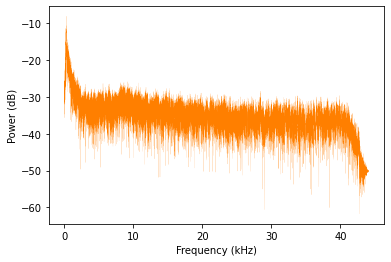

In [ ]:
# from http://myinspirationinformation.com/uncategorized/audio-signals-in-python/

fourier = np.fft.fft(x)

fourier = fourier[0:sr]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(sr)

#calculate the frequency at each point in Hz
freqArray = np.arange(0, sr, 1.0) * (x.shape[0]*1.0/sr);

plt.plot(freqArray/1000, 10*np.log10(fourier), color='#ff7f00', linewidth=0.1)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')